<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_8/8_4_1_FaceRecognitionLandmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Recognition - Landmarks 


---

Face landmarks refer to the specific points or regions on a face that are used to identify or recognize a face. The face_recognition library provides a range of face recognition and detection capabilities, *including the ability to extract facial landmarks from images*

Using facial landmarks, face_recognition can accurately locate key facial features such as eyes, nose, chin, mouth, and eyebrows in an image. These landmarks can then be used for various applications, including face recognition, emotion recognition, and facial expression analysis.

Setup
1. Change runtime to GPU 
  `Runtime > Change runtime type > Hardware Accelerator > GPU`
2. Install face_recognition package
  ```
  !pip install face_recognition
  ```
3. Download sample images 
4. Analyze a Facial Landmarks 
  - use this for emotion / smile detection 


In [35]:
# install face_recognition package 
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
# import libraries 
import requests
import zipfile
import os 
import numpy as np

# image stuff 
import face_recognition
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageOps, ImageEnhance
from google.colab.patches import cv2_imshow

# 3. Download sample images


---

The zip file contains synthetically generated faces using StyleGAN2 and a face Aging network. 

StyleGAN2 is a generative adversarial network (GAN) that is used for generating high-quality synthetic images. It was developed by Nvidia researchers in 2019 as an improvement over the original StyleGAN, with a number of new features and improvements to the training process.

One of the key features of StyleGAN2 is its ability to generate high-resolution images up to 1024 x 1024 pixels, with impressive levels of detail and realism. This is achieved through a progressive training approach, in which the network is trained on increasingly high-resolution images over time.



---

anyway, just run the block of code below: 

In [37]:
# set the URL of the ZIP file on GitHub
url = "https://github.com/MonkeyWrenchGang/MGTPython/blob/main/module_8/img/Module8Faces.zip?raw=true"
# send a GET request to the URL and save the content to a local file
response = requests.get(url)
filename = "Module8Faces.zip"
with open(filename, "wb") as f:
    f.write(response.content)

# extract the contents of the ZIP file to a directory
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')

print("-- downloaded images check your 'faces' directory --")

-- downloaded images check your 'faces' directory --


## Display a Face


---

Here we are going to use the PIL library to open an image and display it in our notebook. Because these images are so large i'm going to cut it in half! 




Original image size: 1024 1024
Resized image size: 512 512


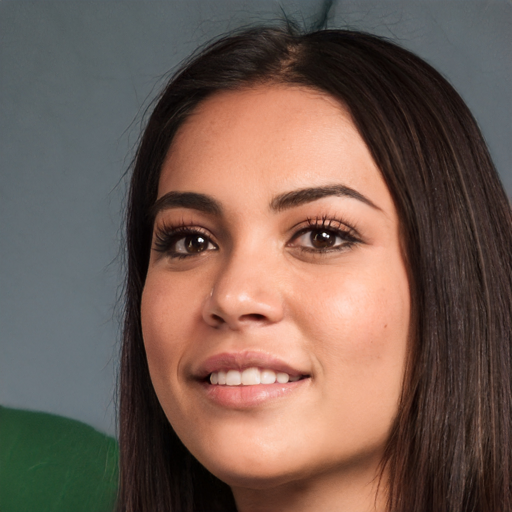

In [51]:
# Define the URL of the image file on GitHub
image_file = "/content/faces/face_11.jpeg"

# open an image 
image = Image.open(image_file)

# Get the original size of the image
width, height = image.size
print("Original image size:", width, height)

# Resize the image to half its original size
new_size = (int(width/2), int(height/2))
resized_image = image.resize(new_size)

new_width, new_height = resized_image.size
print("Resized image size:", new_width, new_height)

# Display the image in the Colab notebook
display(resized_image)

# Get the new size of the image


# 4. Facial Landmarks 

1. load two faces using `load_image_file`
  - load_image_file : When you call load_image_file with a file path as an argument, it reads the image file from disk and converts it into a **NumPy array**. The NumPy array represents the image as a **matrix of pixel values**, where each pixel is represented by a set of **RGB (red, green, blue)** values.


2. Get the location of a face using `face_locations()`
- `face_locations()`  detects the location of one or more faces in an image. The function returns a list of tuples, where each tuple contains the coordinates of a rectangle aka bounding box that encloses a detected face. 
- this is how you can extract multiple faces from an image! 


3. Get the facial landmarks using `face_landmarks()`
-  `face_landmarks()` generates upto 68 facial landmarks for each face detected in an image. These landmarks include points such as the corners of the eyes, the tip of the nose, the corners of the mouth, and the edges of the jawline.


4. Display the image highlighting the landmarks! 



In [46]:
# 1. load two faces usig load_image_file
face_file1 = "/content/faces/face_11.jpeg"
image1 = face_recognition.load_image_file(face_file1)



In [47]:
# 2. find the face location (assume 1 face to start)
face_locations = face_recognition.face_locations(image1)

# 3. extract the face landmarks 
face_landmarks = face_recognition.face_landmarks(image1, face_locations)

# print the facial features for the 1st face hence the face_landmarks[0]
# if there were more we'd have to cycle through each face. 
print(face_landmarks[0].keys())
for landmark in ['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge', 'nose_tip', 'left_eye', 'right_eye', 'top_lip', 'bottom_lip']:
  print("{} landmark location {} ".format(landmark,face_landmarks[0][landmark]))

dict_keys(['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge', 'nose_tip', 'left_eye', 'right_eye', 'top_lip', 'bottom_lip'])
chin landmark location [(295, 514), (281, 582), (282, 651), (293, 718), (309, 786), (336, 849), (375, 903), (424, 947), (490, 963), (570, 958), (651, 937), (729, 905), (790, 853), (824, 780), (841, 696), (853, 611), (858, 530)] 
left_eyebrow landmark location [(299, 429), (324, 395), (365, 385), (409, 392), (449, 413)] 
right_eyebrow landmark location [(533, 407), (589, 381), (650, 369), (713, 381), (765, 415)] 
nose_bridge landmark location [(484, 475), (475, 515), (465, 555), (454, 596)] 
nose_tip landmark location [(423, 653), (446, 658), (471, 664), (502, 656), (534, 648)] 
left_eye landmark location [(336, 498), (362, 472), (401, 471), (436, 501), (398, 508), (360, 509)] 
right_eye landmark location [(579, 492), (618, 462), (659, 461), (697, 484), (662, 498), (620, 498)] 
top_lip landmark location [(374, 762), (404, 727), (442, 706), (470, 712), (500, 7

In [41]:
face_landmarks[0]["chin"]

[(179, 505),
 (186, 585),
 (197, 663),
 (217, 739),
 (253, 807),
 (310, 867),
 (380, 913),
 (454, 946),
 (526, 955),
 (592, 936),
 (647, 885),
 (695, 829),
 (727, 766),
 (744, 696),
 (752, 627),
 (753, 560),
 (746, 494)]

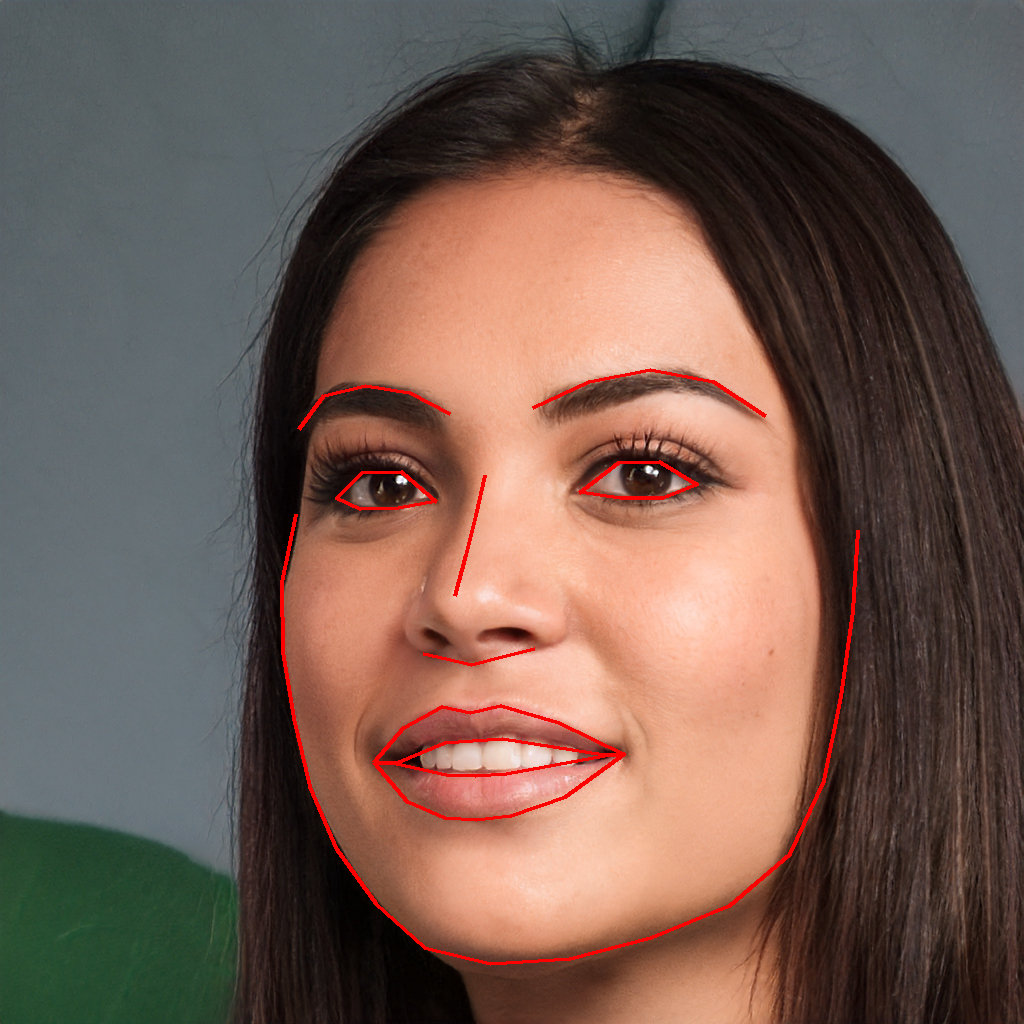

In [48]:
# 4. create a Pillow image from the input image
pil_image = Image.fromarray(image1)

# create a Pillow draw object
draw = ImageDraw.Draw(pil_image)

# iterate over the facial features and draw them on the image
for face_landmark in face_landmarks:
    # draw the chin
    draw.line(face_landmark['chin'], fill='red', width=4)

    # draw the left eyebrow
    draw.line(face_landmark['left_eyebrow'], fill='red', width=4)

    # draw the right eyebrow
    draw.line(face_landmark['right_eyebrow'], fill='red', width=4)

    # draw the nose bridge
    draw.line(face_landmark['nose_bridge'], fill='red', width=4)

    # draw the nose tip
    draw.line(face_landmark['nose_tip'], fill='red', width=4)

    # draw the left eye
    draw.line(face_landmark['left_eye'] + [face_landmark['left_eye'][0]], fill='red', width=4)

    # draw the right eye
    draw.line(face_landmark['right_eye'] + [face_landmark['right_eye'][0]], fill='red', width=4)

    # draw the top lip
    draw.line(face_landmark['top_lip'] + [face_landmark['top_lip'][0]], fill='red', width=4)

    # draw the bottom lip
    draw.line(face_landmark['bottom_lip'] + [face_landmark['bottom_lip'][0]], fill='red', width=4)

# show the image with the facial features
pil_image.show()

## Smile Detection


---

So the "right way" is to use a model that has this feature already built in. We can "fake it" by calculating the distance between mouth corners.

In [49]:
# Generate facial landmarks for each face detected
face_landmarks_list = face_recognition.face_landmarks(image1, face_locations)


# Define a function to calculate the distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((np.array(a) - np.array(b))**2))

# Define a threshold value for smile detection
SMILE_THRESHOLD = 50

# Iterate over each face in the image
for face_landmarks in face_landmarks_list:
    # Extract the position of the mouth corners
    mouth_left = face_landmarks['top_lip'][0]
    mouth_right = face_landmarks['top_lip'][-1]
    
    # Calculate the distance between the mouth corners
    smile_distance = euclidean_distance(mouth_left, mouth_right)
    
    # Classify the face as a smile or not based on the distance
    if smile_distance < SMILE_THRESHOLD:
        label = "smiling"
    else:
        label = "not smiling"
        
text = "{} confidence: {:.2f}%".format(label,(100-smile_distance))
print(text)

22.02271554554524
smiling confidence: 77.98%


## Smile Detection


---

The “less accurate” way is to measure facial features : 
- Extract the position of the mouth corners.
- Calculate the distance between the two mouth corners using Euclidean distance or another suitable distance metric.
- Use a threshold value to determine whether the distance between the mouth corners is consistent with a smile. 



Resized image size: 512 512


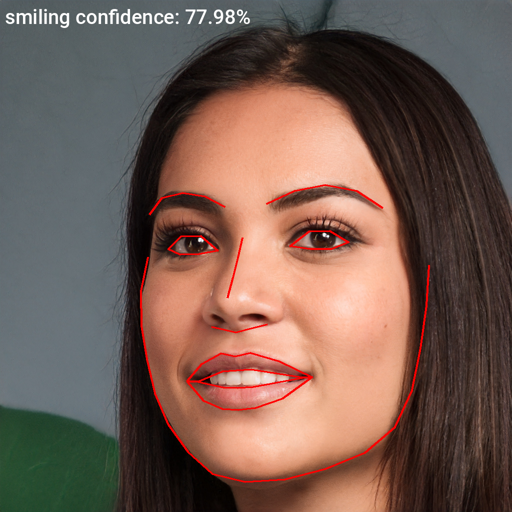

In [50]:

# create a Pillow draw object
draw = ImageDraw.Draw(pil_image)
# Define the text to add
text = "{} confidence: {:.2f}%".format(label,(100-smile_distance))

# Define the font and size
font = ImageFont.truetype("/content/faces/Roboto-Medium.ttf", 40)

# Define the position of the text
x, y = 10, 10

# Draw the text on the image
draw.text((x, y), text, fill=(255, 255, 255), font=font)

# Resize the image to half its original size
new_size = (int(width/2), int(height/2))
resized_image = pil_image.resize(new_size)

new_width, new_height = resized_image.size
print("Resized image size:", new_width, new_height)

# Display the image in the Colab notebook
display(resized_image)
